# Uber Data Science Take Home Assignment

**Importing Necessary libraries**

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv('uber_dataset.csv')
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [112]:
df.shape

(336, 7)

In [113]:
df.isnull().sum()

Date                321
Time (Local)          0
Eyeballs              0
Zeroes                0
Completed Trips       0
Requests              0
Unique Drivers        0
dtype: int64

In [114]:
df.head(30)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


**Preprocessing**

In [115]:
df['Date'].ffill(axis=0, inplace = True)
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [116]:
df.isnull().sum()

Date                0
Time (Local)        0
Eyeballs            0
Zeroes              0
Completed Trips     0
Requests            0
Unique Drivers      0
dtype: int64

In [117]:
df.duplicated().sum()

0

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [119]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

## Problem Statements with solution

**1.** Date with the most completed trips during the two week period.

In [120]:
df.groupby('Date').agg(Total_Completed_Trips = ('Completed Trips ', 'sum')).reset_index().sort_values(by = 'Total_Completed_Trips', ascending = False).head(1)

,Date,Total_Completed_Trips
12,22-Sep-12,248


**2.** Highest number of completed trips within 24 hour period.

In [121]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (Local)'].astype(str) + ':00:00')
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Datetime
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00


In [122]:
df.set_index('Datetime', inplace = True)
df_rolling_sum = df['Completed Trips '].rolling('24H').sum().shift(-23)
df_rolling_sum.head()

Datetime
2012-09-10 07:00:00    29.0
2012-09-10 08:00:00    29.0
2012-09-10 09:00:00    27.0
2012-09-10 10:00:00    27.0
2012-09-10 11:00:00    28.0
Name: Completed Trips , dtype: float64

In [123]:
df_rolling_sum.sort_values(ascending = False).head(1)

Datetime
2012-09-21 17:00:00    278.0
Name: Completed Trips , dtype: float64

**3.** Hour of the day with the most requests during the two week period.

In [124]:
df.groupby('Time (Local)').agg(Total_Requests = ('Requests ', 'sum')).reset_index().sort_values(by = 'Total_Requests', ascending = False).head(1)

,Time (Local),Total_Requests
23,23,184


**4.** Percentage of all zeroes during the two week period occured on weekend (Friday at 5 pm to Sunday at 3 am)

In [125]:
df = df.reset_index()
df['Day_of_week'] = df['Datetime'].dt.day_name()
df.head()

,Datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday


In [126]:
numerator = df[((df['Day_of_week'] == 'Friday') & (df['Time (Local)'] >= 17)) |
   (df['Day_of_week'] == 'Saturday') |
   ((df['Day_of_week'] == 'Sunday') & (df['Time (Local)'] < 3))
  ]['Zeroes '].sum()

numerator

641

In [127]:
denominator = df['Zeroes '].sum()

denominator

1429

In [128]:
round(numerator / denominator *100, 2)

44.86

**5.** Weighted average ratio of completed trips per driver during the two week period

In [129]:
df_drivers = df[df['Unique Drivers'] > 0]
df_drivers['Ratio'] = df_drivers['Completed Trips '] / df_drivers['Unique Drivers']
df_drivers.head()

,Datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day_of_week,Ratio
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0.222222
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0.142857
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0.000000
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0.000000
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0.363636


In [130]:
num = sum(df_drivers['Ratio'] * df_drivers['Completed Trips '])
denom = sum(df_drivers['Completed Trips '])

# Weighted average

num / denom

0.8282775715092396

**6.** The busiest 8 consecutive hours over the two week period in terms of unique requests. A new shift starts in every 8 hours and assuming that a driver will work same shift each day.

In [131]:
df.set_index('Datetime', inplace = True)
df_rolling_sum = df['Requests '].rolling('8H').sum().shift(-7)
df_rolling_sum.head()

Datetime
2012-09-10 07:00:00    11.0
2012-09-10 08:00:00    11.0
2012-09-10 09:00:00    13.0
2012-09-10 10:00:00    17.0
2012-09-10 11:00:00    20.0
Name: Requests , dtype: float64

In [132]:
df_rolling_sum.sort_values(ascending = False).head(1)

Datetime
2012-09-21 17:00:00    207.0
Name: Requests , dtype: float64

**7.** Checking if the driver supply always increase when demand increases during the two week period. 

In [133]:
df = df.reset_index()
df.head()

,Datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday


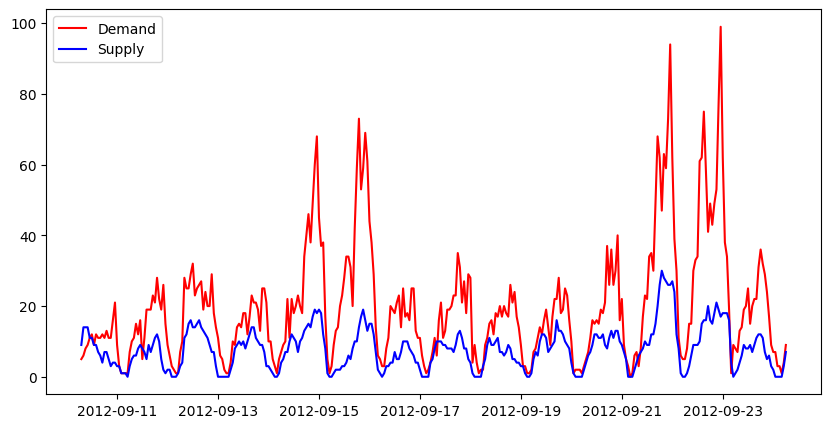

In [153]:

plt.figure(figsize=(10,5))
plt.plot(df['Datetime'], df['Eyeballs '], color = 'red', label = 'Demand')
plt.plot(df['Datetime'], df['Unique Drivers'], color = 'blue', label = 'Supply')
plt.legend()
plt.show()

**8.** 72 hours period in which the ratio of Zeroes to Eyeballs is the highest.

In [135]:
df.set_index('Datetime', inplace = True)
df_rolling_sum = df['Zeroes '].rolling('72H').sum().shift(-71) / df['Eyeballs '].rolling('72H').sum().shift(-71)
df_rolling_sum.sort_values(ascending = False).head(1)

Datetime
2012-09-15 05:00:00    0.292977
dtype: float64

**9.** Hour in which we should add 5 drivers to any single hour of every day during the two week period.

In [136]:
df = df.reset_index()
df.head()

,Datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday


In [140]:
eye_vs_driver = df.groupby('Time (Local)').agg(Total_eyeballs = ('Eyeballs ', 'sum'), Total_drivers = ('Unique Drivers', 'sum')).reset_index()
eye_vs_driver['ratio'] = eye_vs_driver['Total_drivers'] / eye_vs_driver['Total_eyeballs']
eye_vs_driver.sort_values(by = 'ratio', ascending = True).head(1)

,Time (Local),Total_eyeballs,Total_drivers,ratio
23,23,488,119,0.243852


**10.** Checking if there is exactly two weeks of data for the analysis.

In [148]:
No_of_days = df['Datetime'].max() - df['Datetime'].min()
No_of_days

Timedelta('13 days 23:00:00')

**11.** Time which might make more sense to consider a true "end" instead of midnight.

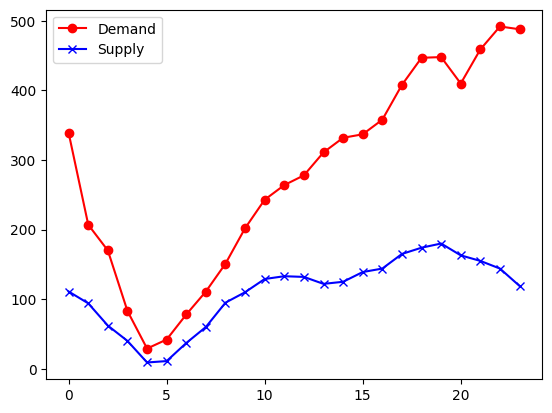

In [150]:
minimum = df.groupby('Time (Local)').agg(Total_eyeballs = ('Eyeballs ', 'sum'), Total_drivers = ('Unique Drivers', 'sum')).reset_index()
plt.plot(minimum['Time (Local)'], minimum['Total_eyeballs'], color = 'red', label = 'Demand', marker = 'o')
plt.plot(minimum['Time (Local)'], minimum['Total_drivers'], color = 'blue', label = 'Supply', marker = 'x')
plt.legend()
plt.show()

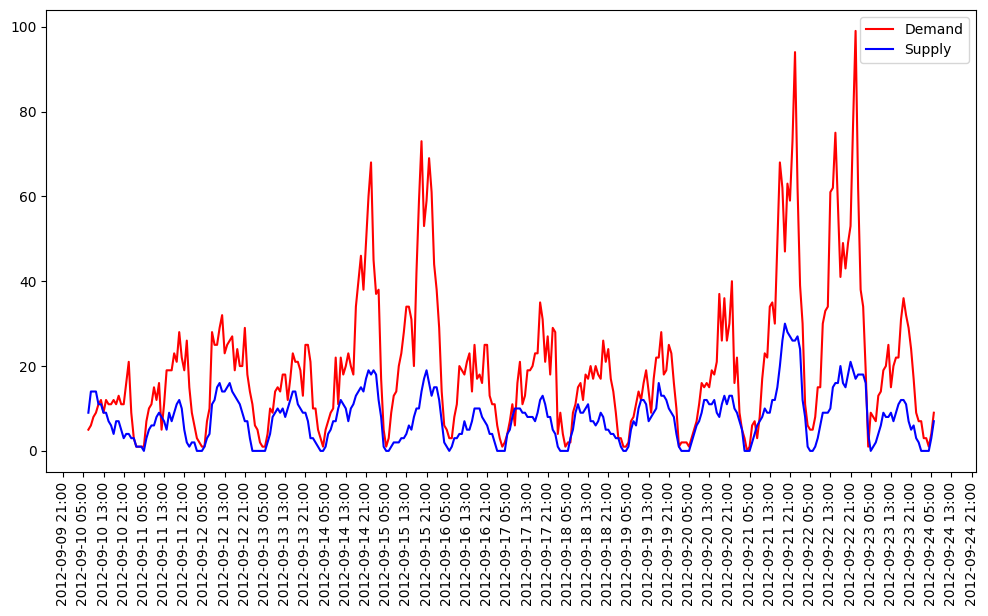

In [154]:
plt.figure(figsize=(12,6))
plt.plot(df['Datetime'], df['Eyeballs '], color = 'red', label = 'Demand')
plt.plot(df['Datetime'], df['Unique Drivers'], color = 'blue', label = 'Supply')
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval = 8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.legend()
plt.xticks(rotation = 90)
plt.show()

From above, the true end is 4-5 AM.